In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import pycountry_convert as pc
import warnings
# import Current as C
# from sklearn.preprocessing import LabelEncoder

In [20]:
warnings.filterwarnings('ignore')
df = pd.read_csv("./FPData2.csv")
df.columns = ['Country', 'year', 'ladder', 'gdp', 'support', 'life_expec', 'freedom', 'generosity','corruption','positive', 'negative']
y = df.groupby('Country').count()
less = y[y['year'] <= 10].index.tolist()
df_update = df[~df['Country'].isin(less)]
year_list = range(2011, 2020)
df_11 = df_update[df_update['year'].isin(year_list)]
y1 = df_11.groupby('Country').count()
less1 = y1[y1['year'] <= 8].index.tolist()
df_update1 = df_11[~df_11['Country'].isin(less1)]
df_update2 = df_update1.dropna()
df_update3 = df_update2

def continent(name):
    part1 = pc.country_name_to_country_alpha2(name)
    code = pc.country_alpha2_to_continent_code(part1)
    continent = pc.convert_continent_code_to_continent_name(code)
    return continent
df_update2['Country'] = df_update2['Country'].replace({'Congo (Brazzaville)':'Congo'})
df_update2['Country'] = df_update2['Country'].replace({'Turkiye':'Turkey'})
df_update2['Continent'] = df_update2.apply(lambda row: continent(row.Country), axis=1)
def cont_val(continent):
    continents = ['Asia', 'Africa', 'North America', 'South America', 'Oceania', 'Europe']
    return continents.index(continent)
df_update2['Continent'] = df_update2.apply(lambda row: cont_val(row.Continent), axis=1)



In [45]:
df_ind = df_update2.set_index('Country')
df_3 = df_ind.groupby('Country').mean()
df_ind = df_3.drop(['Continent'], axis=1)
df_ind

,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative
Country,,,,,,,,,,
Afghanistan,2015.000000,3.361333,7.646222,0.506556,52.627778,0.469000,0.042333,0.853444,0.474333,0.349778
Albania,2015.000000,4.944333,9.400778,0.690444,68.716667,0.693444,-0.084111,0.882889,0.562889,0.311111
Argentina,2015.000000,6.393222,10.067778,0.903444,66.822222,0.807667,-0.180222,0.830778,0.747778,0.282778
Armenia,2015.000000,4.535667,9.355000,0.729889,66.038889,0.600556,-0.194000,0.837222,0.506778,0.441556
Australia,2015.000000,7.275778,10.769778,0.943444,70.594444,0.925000,0.261444,0.402889,0.734333,0.210111
...,...,...,...,...,...,...,...,...,...,...
Venezuela,2015.000000,5.678222,8.047556,0.905222,64.950000,0.625000,-0.081667,0.821444,0.771000,0.284444
Vietnam,2014.833333,5.358333,9.000333,0.831333,64.913333,0.891500,-0.067333,0.787167,0.581333,0.196500
Yemen,2014.571429,3.747286,7.918857,0.715000,58.232143,0.623571,-0.148429,0.819571,0.454571,0.277000


In [36]:
'''PCA Analysis'''

# SCREE PLOT

# Scaling
scaler = StandardScaler()
scaler.fit(df_ind)

df_scaled = scaler.transform(df_ind)

# PCA
pca = PCA(n_components=4)
model = pca.fit(df_scaled)

Z = pca.transform(df_scaled)

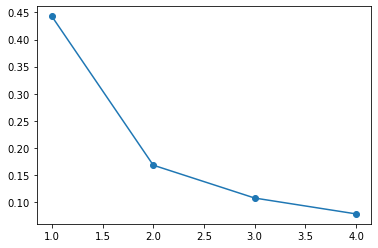

In [37]:
plt.plot(np.arange(1, 5), model.explained_variance_ratio_, marker='o')

In [40]:
df_country = df_ind.groupby(['Country']).mean()
df_country

,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative
Country,,,,,,,,,,
Afghanistan,2015.000000,3.361333,7.646222,0.506556,52.627778,0.469000,0.042333,0.853444,0.474333,0.349778
Albania,2015.000000,4.944333,9.400778,0.690444,68.716667,0.693444,-0.084111,0.882889,0.562889,0.311111
Argentina,2015.000000,6.393222,10.067778,0.903444,66.822222,0.807667,-0.180222,0.830778,0.747778,0.282778
Armenia,2015.000000,4.535667,9.355000,0.729889,66.038889,0.600556,-0.194000,0.837222,0.506778,0.441556
Australia,2015.000000,7.275778,10.769778,0.943444,70.594444,0.925000,0.261444,0.402889,0.734333,0.210111
...,...,...,...,...,...,...,...,...,...,...
Venezuela,2015.000000,5.678222,8.047556,0.905222,64.950000,0.625000,-0.081667,0.821444,0.771000,0.284444
Vietnam,2014.833333,5.358333,9.000333,0.831333,64.913333,0.891500,-0.067333,0.787167,0.581333,0.196500
Yemen,2014.571429,3.747286,7.918857,0.715000,58.232143,0.623571,-0.148429,0.819571,0.454571,0.277000


In [41]:
countries = df_country.groupby('Country').mean().reset_index()
countries

,Country,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative
0,Afghanistan,2015.000000,3.361333,7.646222,0.506556,52.627778,0.469000,0.042333,0.853444,0.474333,0.349778
1,Albania,2015.000000,4.944333,9.400778,0.690444,68.716667,0.693444,-0.084111,0.882889,0.562889,0.311111
2,Argentina,2015.000000,6.393222,10.067778,0.903444,66.822222,0.807667,-0.180222,0.830778,0.747778,0.282778
3,Armenia,2015.000000,4.535667,9.355000,0.729889,66.038889,0.600556,-0.194000,0.837222,0.506778,0.441556
4,Australia,2015.000000,7.275778,10.769778,0.943444,70.594444,0.925000,0.261444,0.402889,0.734333,0.210111
...,...,...,...,...,...,...,...,...,...,...,...
101,Venezuela,2015.000000,5.678222,8.047556,0.905222,64.950000,0.625000,-0.081667,0.821444,0.771000,0.284444
102,Vietnam,2014.833333,5.358333,9.000333,0.831333,64.913333,0.891500,-0.067333,0.787167,0.581333,0.196500
103,Yemen,2014.571429,3.747286,7.918857,0.715000,58.232143,0.623571,-0.148429,0.819571,0.454571,0.277000
104,Zambia,2015.000000,4.452667,8.113667,0.741000,52.438889,0.781000,0.026889,0.806000,0.681222,0.330556


<Figure size 432x288 with 0 Axes>

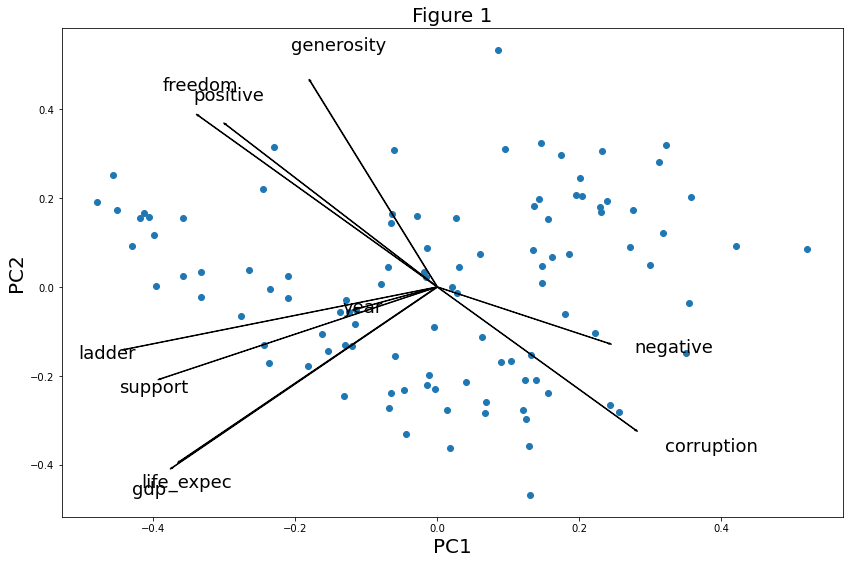

<Figure size 432x288 with 0 Axes>

In [38]:
# BIPLOT *OLD DON'T USE THIS*
pca = PCA(n_components=2)
PC_scores = pd.DataFrame(pca.fit_transform(df_scaled),
               columns = ['PC 1', 'PC 2'])
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], 
                        index=df_ind.columns)


PC1 = pca.fit_transform(df_scaled)[:,0]
PC2 = pca.fit_transform(df_scaled)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = df_ind.columns

fig, ax = plt.subplots(figsize=(14, 9))
 
for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i])
    ax.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature, fontsize=18)
 
ax.scatter(PC1 * scalePC1,PC2 * scalePC2)
 
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Figure 1', fontsize=20)
plt.figure()

<Figure size 432x288 with 0 Axes>

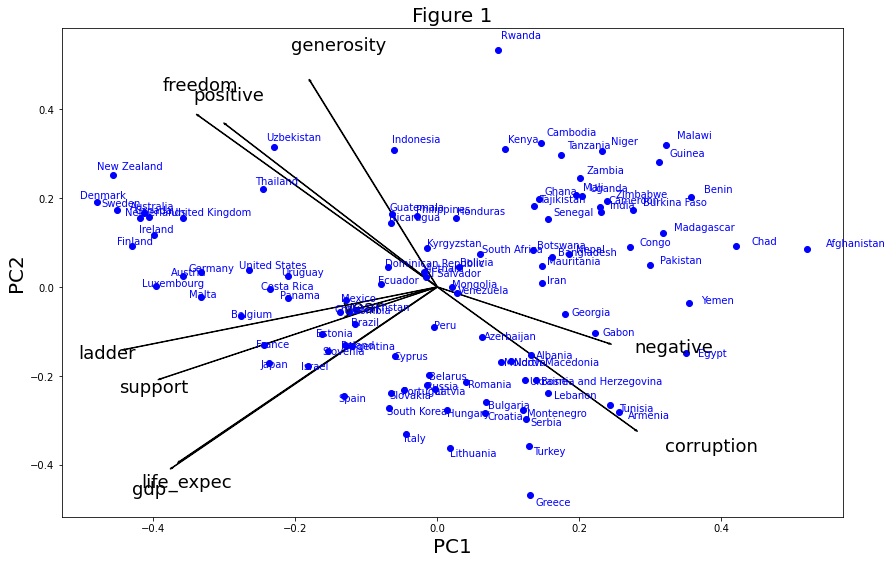

<Figure size 432x288 with 0 Axes>

In [43]:
# NEW BIPLOT CODE *USE THIS*
pca = PCA(n_components=2)
PC_scores = pd.DataFrame(pca.fit_transform(df_scaled),
               columns = ['PC 1', 'PC 2'])
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], 
                        index=df_ind.columns)


PC1 = pca.fit_transform(df_scaled)[:,0]
PC2 = pca.fit_transform(df_scaled)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = df_ind.columns

fig, ax = plt.subplots(figsize=(14, 9))
z1 = PC1 * scalePC1
z2 = PC2 * scalePC2
for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i])
    ax.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature, fontsize=18)
    

for i in range(106):
    plt.plot(z1[i], z2[i], 'bo')
    plt.text(z1[i]*1.05, z2[i]*1.05, list(countries.Country)[i], color='b')
    
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Figure 1', fontsize=20)
plt.figure()

In [25]:
model.components_

array([[-4.05074081e-02, -4.34009268e-01, -3.92937387e-01,
        -3.87614984e-01, -3.79122631e-01, -2.93365551e-01,
        -1.26104044e-01,  2.55963532e-01, -2.64869256e-01,
         2.07492408e-01, -2.84471864e-01],
       [-2.21350335e-02,  3.52060912e-02,  3.00911167e-01,
         1.29151360e-01,  2.78428824e-01, -4.20512465e-01,
        -4.66143398e-01,  3.26383388e-01, -3.91283435e-01,
         1.28246595e-01,  3.78581464e-01],
       [ 7.75312667e-01,  5.35498856e-02,  3.90445313e-02,
        -1.33363275e-01,  1.55814118e-01,  1.60808821e-01,
         2.36054328e-02, -6.47908435e-03,  4.24856863e-04,
         5.69607181e-01, -3.90282843e-02],
       [-4.77340308e-01,  1.50956488e-01,  9.56964668e-02,
        -1.04384681e-01,  1.96510927e-01, -1.22930761e-01,
         5.68301643e-01,  1.80994555e-01,  2.37600830e-02,
         5.64893970e-01,  1.34295386e-02]])

In [9]:
df_noE = df_update2.loc[(df_update2.Continent != 5)]
df_noE_ind = df_noE.set_index('Country')

In [10]:
'''PCA Analysis'''

# Mean countries
df_noE.groupby('Country').mean()
le = LabelEncoder()
df_encoded = df_noE_ind.groupby('Country').mean()
pca = PCA(n_components=4)
model1 = pca.fit(df_noE_ind)

# Transformed data
Z = pca.transform(df_noE_ind)

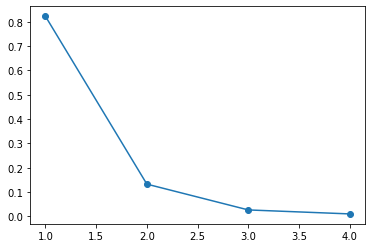

In [11]:
plt.plot(np.arange(1, 5), model1.explained_variance_ratio_, marker='o')

In [12]:
df_noA = df_update2.loc[(df_update2.Continent != 1)]
df_noA_ind = df_noA.set_index('Country')

In [13]:
'''PCA Analysis'''

# Mean countries
df_noA.groupby('Country').mean()
le = LabelEncoder()
df_encoded = df_noA_ind.groupby('Country').mean()
pca = PCA(n_components=4)
model1 = pca.fit(df_noA_ind)

# Transformed data
Z = pca.transform(df_noA_ind)

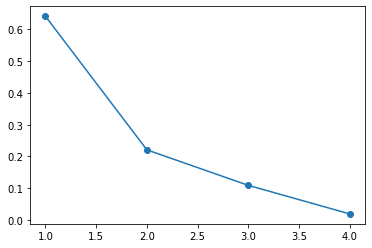

In [14]:
plt.plot(np.arange(1, 5), model1.explained_variance_ratio_, marker='o')

In [15]:
PC1 = pca.fit_transform(df_noA_ind)[:,0]
PC2 = pca.fit_transform(df_noA_ind)[:,1]
ldngs = pca.components_

In [25]:
scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = df_noA_ind.[3:11]

AttributeError: 'DataFrame' object has no attribute 'features'

In [29]:
modelnow = PCA(df_ind,
  normalize = True,
  ncomp = 2
)

TypeError: __init__() got an unexpected keyword argument 'normalize'

Text(0.5, 1.0, 'Figure 4')

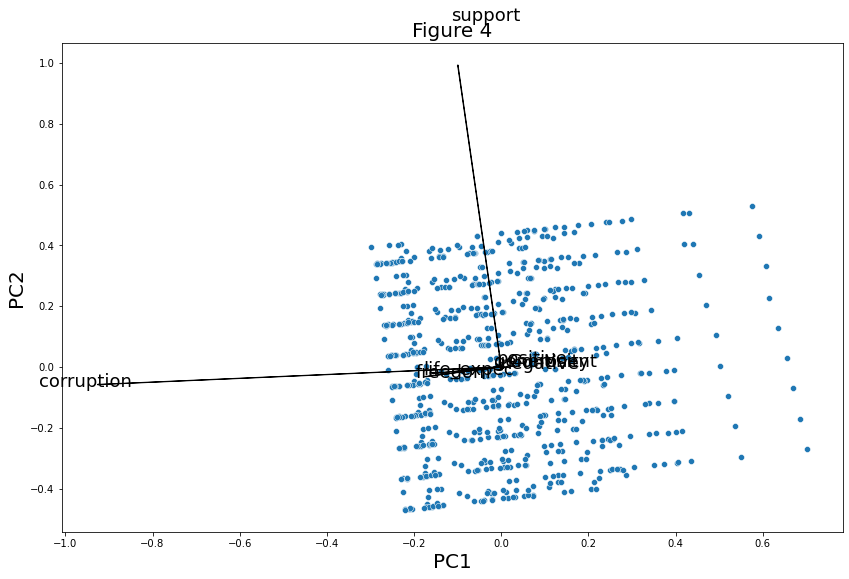

In [24]:
plt.figure(figsize=(14,9))
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i])
    plt.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature, fontsize=18)
 
sns.scatterplot(x=PC1 * scalePC1,
                y=PC2 * scalePC2)
 
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.title('Figure 4', fontsize=20)

NameError: name 'penguin' is not defined